<a href="https://colab.research.google.com/github/alejandrolq/StaticalLearningII-Practicas/blob/main/Practica4_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning II**

**Sección U**

**Práctica 4: Backpropagation**

## Backpropagation

- Entrenar un aproximador para la función Xor usando 2 capas intermedias.
- Usar 2 neuronas en la capa anterior a la salida(segunda capa oculta)
- Usar al menos 2(pueden ser más) en la  primera capa oculta.
- Usar activación ReLu en las capas intermedias y  no activación en la salida
- Usar numpy
- Realizar 5 experimentos, en cada experimento(corrida de entrenamiento):
  - Inicializar los parámetros aleatoriamente con distribución normal centrada en 0 y std = 0.1
  - Retornar la representación intermedia de la segunda capa oculta.
- Graficar las 5 representaciones intermedias(1 por experimento), comparar, comentar y/o concluir.


In [218]:
import numpy as np
import matplotlib.pyplot as plt

In [232]:
class NeuralNetXOR:
  def __init__(self, x, y):
    self.X = x
    self.y = y
    self.wc1 = np.random.normal(0.0, 0.1, (2,2))
    self.wc2 = np.random.normal(0.0, 0.1, (2,2))
    self.wc3 = np.random.normal(0.0, 0.1, (2,1))
            
  def identity(self, X):
    return X

  def derivative_identity(self, output):
    return 1

  def relu(self, X):
    return np.maximum(0, X) 

  def derivative_relu(self, array):
    return np.array([n > 0 for n in array], dtype = np.int)
  
  def sigmoid(self, X):
    return 1/(1+np.exp(-X))

  def eval_capa(self, input, weights, activation):
    z = np.matmul(input, weights)
    return z, activation(z)

  def forward_propagation(self, X):
    l1, l1_a = self.eval_capa(X, self.wc1, self.relu)
    l2, l2_a = self.eval_capa(l1_a, self.wc2, self.relu)
    output, output_a = self.eval_capa(l2_a, self.wc3, self.identity)
    return l1, l1_a, l2, l2_a, output, output_a 

  def back_propagation(self, X):
    l1, l1_a, l2, l2_a, output, output_a = self.forward_propagation(X)
    error = output_a.flatten() - self.y
    d3 = error * self.derivative_identity(output)
    d2 = np.matmul(d3.reshape(-1,1), self.wc3.T) * self.derivative_relu(l2)
    d1 = np.matmul(d2, self.wc2) * self.derivative_relu(l1)
    dC_w2_3 = np.matmul(l2_a.T, d3).reshape(-1,1)
    dC_w1_2 = np.matmul(l1_a.T, d2)
    dC_w0_1 = np.matmul(X.T, d1)
    return dC_w0_1, dC_w1_2, dC_w2_3

  def calc_cost(self, y_hat, y):
    return 0.5*np.mean(np.power(y_hat - y, 2))

  def fit(self, lr = 0.01, epochs = 20, print_cost=False):
    assert(self.X.shape[0] == self.y.shape[0])
    self.costs = []
    for i in range(epochs):
      l1, l1_a, l2, l2_a, output, output_a = self.forward_propagation(self.X)
      cost = self.calc_cost(output_a, self.y)
      self.costs.append(cost)
      gradients = self.back_propagation(self.X)
      self.wc1 = self.wc1 - (lr * gradients[0])
      self.wc2 = self.wc2 - (lr * gradients[1])
      self.wc3 = self.wc3 - (lr * gradients[2])
      if print_cost:
        print("Epoch " + str(i) + ", Cost: " + str(cost))
    self.l2_a = l2_a

  def predict(self):
    l1, l1_a, l2, l2_a, output, output_a = self.forward_propagation(self.X)
    predictions = np.array([n > 0.5 for n in l1], dtype = np.int)    
    return predictions

In [210]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0,1,1,0])

In [235]:
ann = NeuralNetXOR(X, y)

In [236]:
ann.fit(lr=0.1, epochs=20, print_cost=False)

In [245]:
def plot_int_rep(layer, y, n_exp):
  classes = ["0"," 1"]
  fig, ax1= plt.subplots(1, 1)
  fig.tight_layout(pad=3.0)
  ax1.scatter(layer[:,0], layer[:,1], c=y.tolist(), cmap='PiYG')
  ax1.set_title("Representaciones Intermedias Capa 2 - Experimento {}".format(n_exp))
  plt.show()

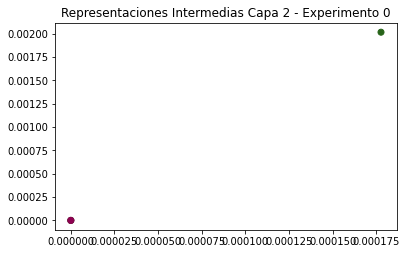

In [247]:
plot_int_rep(ann.l2_a, y, 0)

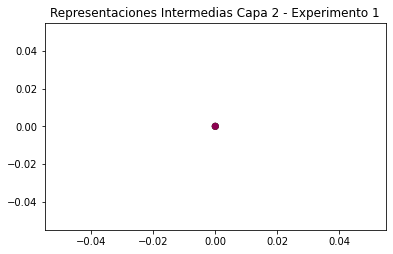

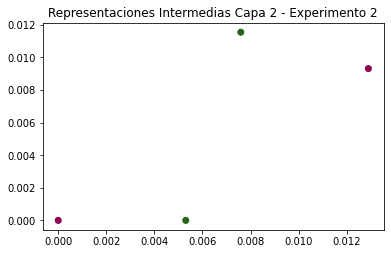

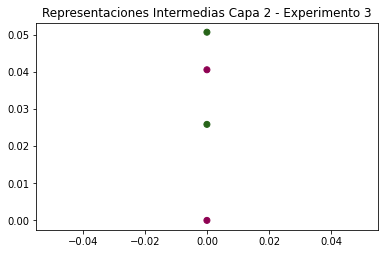

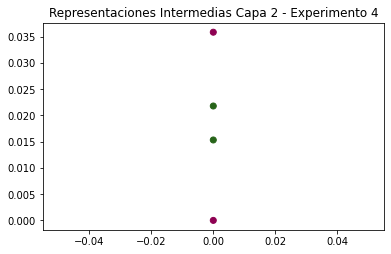

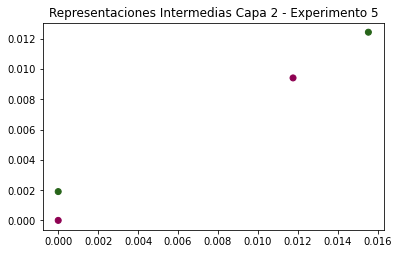

In [250]:
for x in range(1, 6):
  ann = NeuralNetXOR(X, y)
  ann.fit(lr=0.1, epochs=20, print_cost=False)
  plot_int_rep(ann.l2_a, y, x)

## Conclusiones

- Al implementar el algoritmo de backpropagation se obtienen las derivadas parciales de cada uno de los parámetros de la red neuronal de 2 capas ocultas y la salida. 
- Al obtenerse las derivadas parciales permite minimizar la función de costos utilizando el algoritmo de gradient descent.
- Se observa que los resultados obtenidos indican que al utilizar una función de costo como lo es el error cuadrático medio (MSE), junto con la función de activación lineal de salida de la red neuronal, no producen buenos resultados para la clasificación y por lo tanto no se obtiene los resultados esperados para la función de XOR.
- Se observa que las representaciones intermedias no se asemejan a los resultados esperados para la función de XOR en los 5 experimentos realizados.
- Se concluye que el proceso de entrenamiento sería más efectivo, o bien, presentaría mejores resultados utilizando una salida sigmoidal para la clasificación binaria que se tiene y una función de costo de entropía cruzada (cross-entropy).